In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [2]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

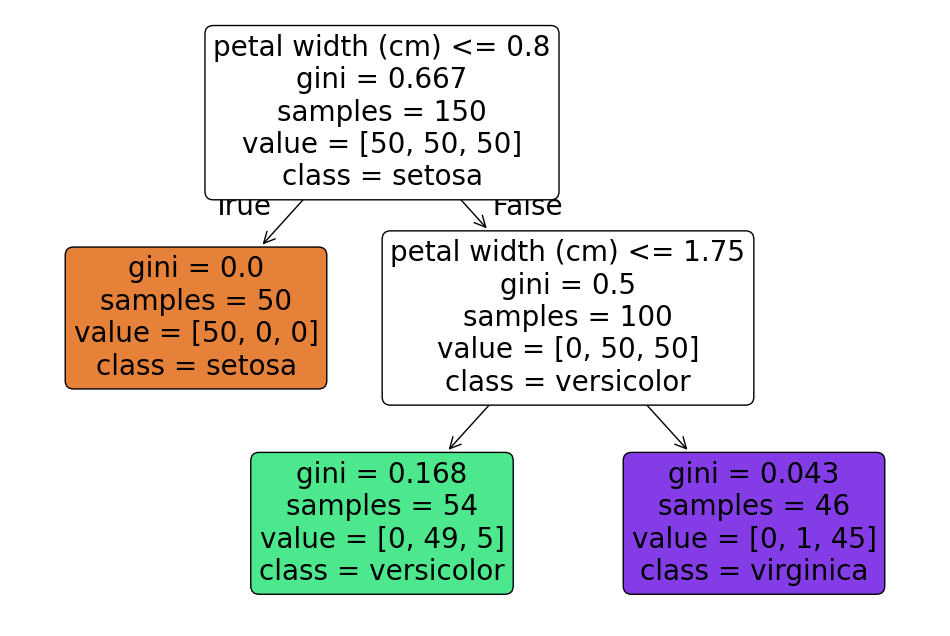

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
plt.show()


In [4]:
tree_clf.predict_proba([[5,1.5]])
# It returns the probability for each class chances

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
tree_clf.predict([[5,1.5]])

array([1])

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X, y)

# Decision Tree Regression may get overfitted if we didnt restrict like giving conditions like max_depth, minimum leaf samples,max leaf nodes and max features

DecisionTreeRegressor(max_depth=2)

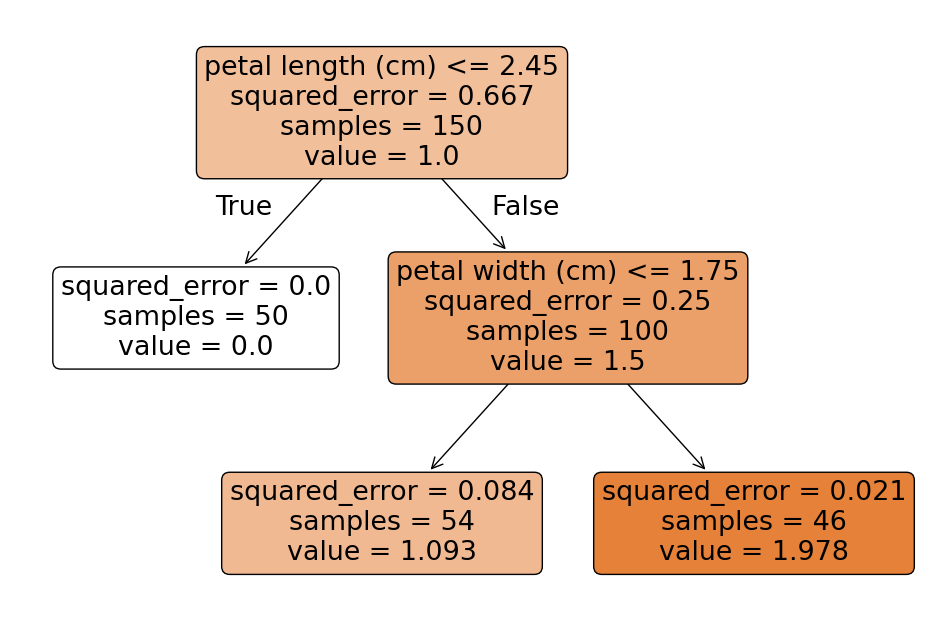

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(
    tree_reg,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
plt.show()

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_moon, y_moon = make_moons(n_samples = 10000, noise = 0.4, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, test_size = 0.2, random_state = 42)

param_grid = {'max_leaf_nodes': list(range(2,100))}

dt_clf = DecisionTreeClassifier(random_state = 42)

grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, n_jobs = -1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]},
             scoring='accuracy')

In [9]:
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")

Best max_leaf_nodes: 23


In [10]:
best_dt_clf = DecisionTreeClassifier(max_leaf_nodes = best_max_leaf_nodes, random_state = 42 )
best_dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=23, random_state=42)

In [11]:
y_pred = best_dt_clf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Test set accuracy: 0.8735


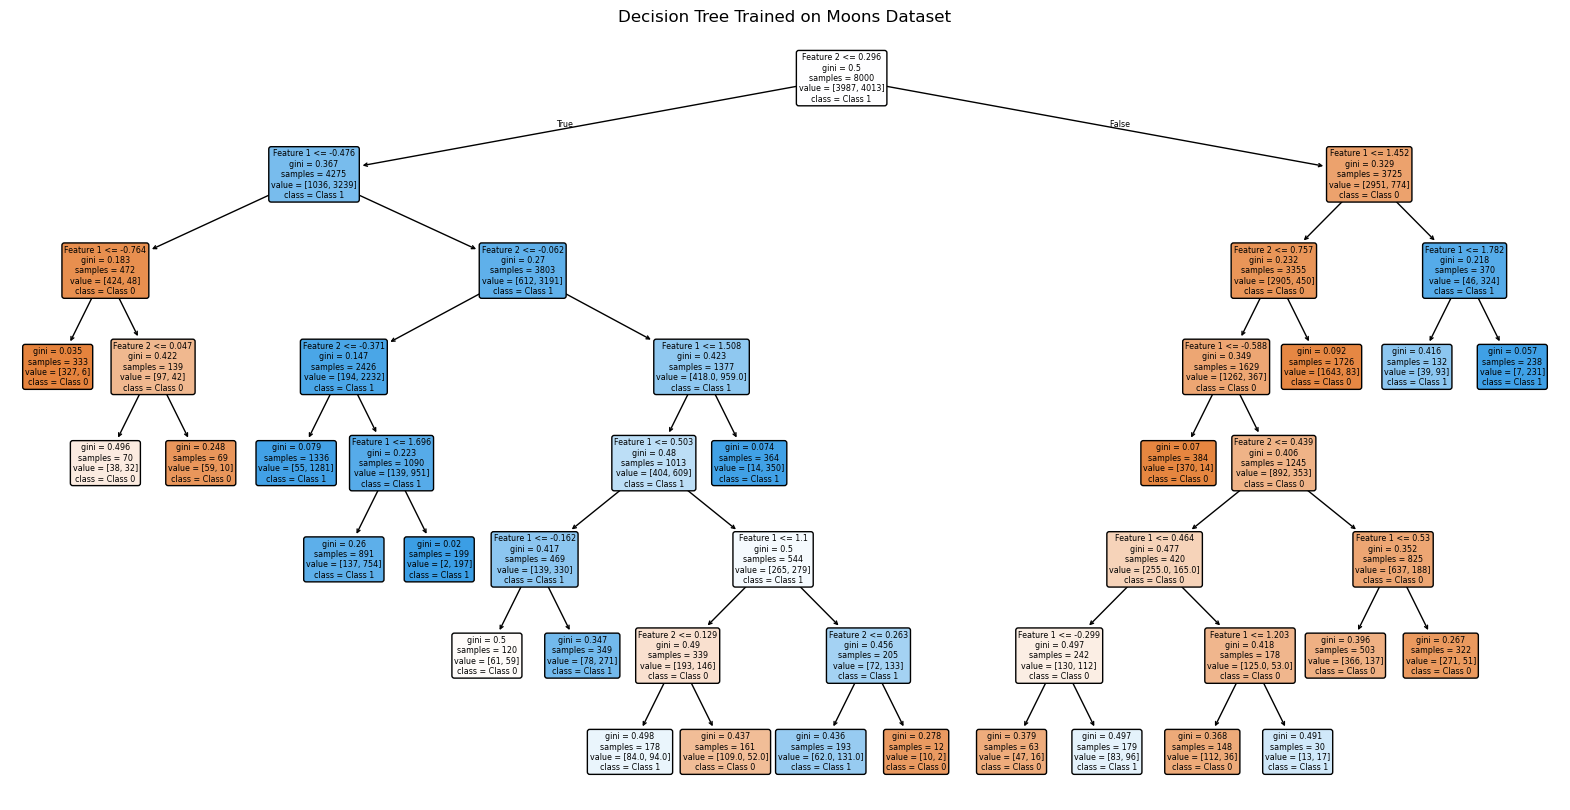

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10)) 
plot_tree(
    best_dt_clf,
    filled=True,
    rounded=True,
    class_names=['Class 0', 'Class 1'], 
    feature_names=['Feature 1', 'Feature 2']
)
plt.title("Decision Tree Trained on Moons Dataset")
plt.show()


In [20]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits = 1000, train_size = 100, random_state = 42)
subsets = list(ss.split(X_train))

# creating multiple decision tress with random of 1000 subset samples to develop an ensemble forest

In [21]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

all_tree_preds = []

for train_idx, _ in subsets:
    tree = DecisionTreeClassifier(max_leaf_nodes = best_max_leaf_nodes, random_state = 42)
    tree.fit(X_train[train_idx], y_train[train_idx])
    preds = tree.predict(X_test)
    all_tree_preds.append(preds)

all_tree_preds = np.array(all_tree_preds)

In [22]:
from scipy.stats import mode

majority_vote_preds, _ = mode(all_tree_preds, axis=0, keepdims=False)
majority_vote_preds = majority_vote_preds.ravel()

In [23]:
from sklearn.metrics import accuracy_score

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, majority_vote_preds)
print(f"Ensemble (Random Forest-style) accuracy: {ensemble_accuracy:.4f}")

#  Compare to single tree trained above:
print(f"Single best tree accuracy: {accuracy:.4f}")

Ensemble (Random Forest-style) accuracy: 0.8735
Single best tree accuracy: 0.8735
